# Import Libraries and Data

In [ ]:
# make imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from google.colab import drive

In [ ]:
# mount to drive
prefix = '/content/drive'
from google.colab import drive
drive.mount(prefix)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# create path to partial csv file
data_path = '/content/drive/My Drive/CIS_520_Final_Project/partial_data.csv'

In [ ]:
# # create path to full csv file
# data_path = '/content/drive/My Drive/CIS_520_Final_Project/data.csv'

In [ ]:
# read data files
data_df = pd.read_csv(data_path)

In [ ]:
# view data
print(data_df.shape)
data_df.head()

(32472, 170)


,cases_0,cases_1,deaths_1,cases_2,deaths_2,cases_3,deaths_3,cases_4,deaths_4,cases_5,...,['State Abbreviation']_UT,['State Abbreviation']_VA,['State Abbreviation']_VT,['State Abbreviation']_WA,['State Abbreviation']_WI,['State Abbreviation']_WV,['State Abbreviation']_WY,['Premature death flag (0 = No Flag/1=Unreliable/2=Suppressed)']_0,['Premature death flag (0 = No Flag/1=Unreliable/2=Suppressed)']_1,['Premature death flag (0 = No Flag/1=Unreliable/2=Suppressed)']_2
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,...,0,0,0,0,0,0,0,1,0,0
1,6.0,10.0,0.0,10.0,0.0,9.0,0.0,17.0,0.0,4.0,...,0,0,0,0,0,0,0,1,0,0
2,152.0,149.0,3.0,192.0,6.0,110.0,9.0,113.0,8.0,122.0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,8.0,22.0,0.0,12.0,0.0,12.0,0.0,17.0,1.0,9.0,...,0,0,0,0,0,0,0,1,0,0


# Split Train and Test Datasets

In [ ]:
# describe label
data_df['cases_0'].describe()

count    32472.000000
mean        25.030734
std        112.887106
min          0.000000
25%          0.000000
50%          3.000000
75%         14.000000
max       5117.000000
Name: cases_0, dtype: float64

In [ ]:
# split data
data_np = data_df.to_numpy()
X = data_np[:, 1:]
y = data_np[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Modeling

In [ ]:
# train and test ridge regression
rdg = RidgeCV(alphas=(1, 10, 100, 1000, 10000), cv=5).fit(X_train, y_train)

y_train_pred = rdg.predict(X_train)
y_test_pred = rdg.predict(X_test)

rdg_train_mae = mean_absolute_error(y_train, y_train_pred)
rdg_test_mae = mean_absolute_error(y_test, y_test_pred)

print('Best parameters are: %s' % rdg.alpha_)
print('Train MAE is: %s' % rdg_train_mae)
print('Test MAE is: %s' % rdg_test_mae)

Best parameters are: 10000
Train MAE is: 11.464480172488786
Test MAE is: 11.898864170882867


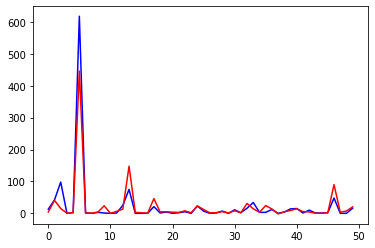

In [ ]:
# visualize predictions
plt.plot(y_test[:50], color='blue')
plt.plot(y_test_pred[:50], color='red')
plt.show()

In [ ]:
# train and test elastic net regression
params = {
    'l1_ratio': [.001, .01, .1, .5, .9, .99, 1],
    'alphas': [1, 100, 250, 500, 1000, 2000, 4000]
}

eln = ElasticNetCV(**params, max_iter=1000000, cv=5, random_state=42).fit(X_train, y_train)

y_train_pred = eln.predict(X_train)
y_test_pred = eln.predict(X_test)

eln_train_mae = mean_absolute_error(y_train, y_train_pred)
eln_test_mae = mean_absolute_error(y_test, y_test_pred)

print('Best alpha is: %s' % eln.alpha_)
print('Best L1 ratio is: %s' % eln.l1_ratio_)
print('Train MAE is: %s' % eln_train_mae)
print('Test MAE is: %s' % eln_test_mae)

Best alpha is: 2000
Best L1 ratio is: 0.01
Train MAE is: 11.425126594418957
Test MAE is: 11.796551855340669


In [ ]:
# see how many coefficients are zeroed out
print(np.count_nonzero(eln.coef_))

19


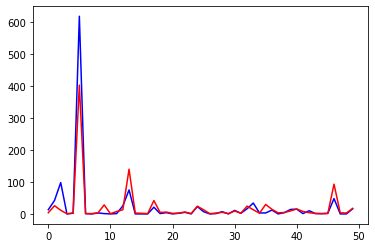

In [ ]:
# visualize predictions
plt.plot(y_test[:50], color='blue')
plt.plot(y_test_pred[:50], color='red')
plt.show()

In [ ]:
# train and test random forest regressor
rfr = RandomForestRegressor(n_estimators=1000, max_features='sqrt', random_state=42).fit(X_train, y_train)

y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

rfr_train_mae = mean_absolute_error(y_train, y_train_pred)
rfr_test_mae = mean_absolute_error(y_test, y_test_pred)

print('Train MAE is: %s' % rfr_train_mae)
print('Test MAE is: %s' % rfr_test_mae)

Train MAE is: 4.291436330524251
Test MAE is: 12.042839591391493


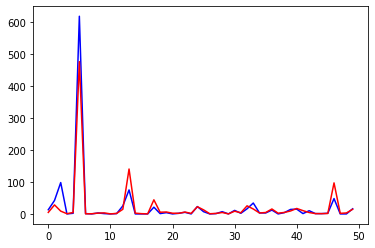

In [ ]:
# visualize predictions
plt.plot(y_test[:50], color='blue')
plt.plot(y_test_pred[:50], color='red')
plt.show()

In [ ]:
# # train and test xgboost
# n_estimators = [100, 200, 500]
# learning_rate = [.001, .01, .1]
# max_depth = [5, 7, 9]

# best_n = None
# best_rate = None
# best_depth = None
# xgb_val_mae = 1000000
# for i in range(3):
#     for j in range(3):
#         for k in range(3):
#             curr_xgb = XGBRegressor(n_estimators=n_estimators[i],
#                          learning_rate=learning_rate[j],
#                          max_depth=max_depth[k],
#                          random_state=42,
#                          verbosity=0).fit(X_train[:int(X_train.shape[0] * 0.8)], y_train[:int(X_train.shape[0] * 0.8)])

#             curr_y_val_pred = curr_xgb.predict(X_train[int(X_train.shape[0] * 0.8):])
#             curr_xgb_val_mae = mean_absolute_error(y_train[int(X_train.shape[0] * 0.8):], curr_y_val_pred)

#             if curr_xgb_val_mae < xgb_val_mae:
#                 xgb_val_mae = curr_xgb_val_mae
#                 best_n = n_estimators[i]
#                 best_rate = learning_rate[j]
#                 best_depth = max_depth[k]

# xgb = XGBRegressor(n_estimators=best_n, learning_rate=best_rate, max_depth=best_depth, random_state=42, verbosity=0).fit(X_train, y_train)

# y_train_pred = xgb.predict(X_train)
# y_test_pred = xgb.predict(X_test)

# xgb_train_mae = mean_absolute_error(y_train, y_train_pred)
# xgb_test_mae = mean_absolute_error(y_test, y_test_pred)

# print('Best number of estimators is: %s' % xgb.n_estimators)
# print('Best learning rate is: %s' % xgb.learning_rate)
# print('Best max depth is: %s' % xgb.max_depth)
# print('Train MAE is: %s' % xgb_train_mae)
# print('Test MAE is: %s' % xgb_test_mae)

In [ ]:
# train and test xgboost given optimal hyperparameters
# ran the snippet above and got the following hyperparameters
'''
Best number of estimators is: 200
Best learning rate is: 0.01
Best max depth is: 9
'''

xgb = XGBRegressor(n_estimators=200, learning_rate=0.01, max_depth=9, random_state=42, verbosity=0).fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

xgb_train_mae = mean_absolute_error(y_train, y_train_pred)
xgb_test_mae = mean_absolute_error(y_test, y_test_pred)

print('Best number of estimators is: %s' % xgb.n_estimators)
print('Best learning rate is: %s' % xgb.learning_rate)
print('Best max depth is: %s' % xgb.max_depth)
print('Train MAE is: %s' % xgb_train_mae)
print('Test MAE is: %s' % xgb_test_mae)

Best number of estimators is: 200
Best learning rate is: 0.01
Best max depth is: 9
Train MAE is: 7.590066353576694
Test MAE is: 11.380396953142167


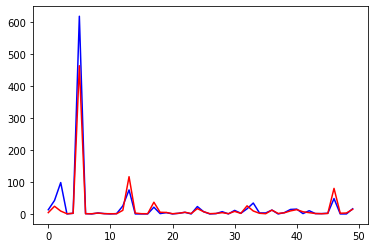

In [ ]:
# visualize predictions
plt.plot(y_test[:50], color='blue')
plt.plot(y_test_pred[:50], color='red')
plt.show()

# Stepwise Regression

In [ ]:
# implement stepwise regression
def update_model(model, mae, incl_features, X_train, y_train, X_test, y_test):
    ''' Inputs:
            model -> best model so far
            mae -> best mae so far
            incl_features -> indices of features included in the current model
            X_train -> train features
            y_train -> train labels
            X_test -> test features
            y_test -> test labels
        
        Outputs:
            model -> best model found
            mae -> best mse found
            incl_features -> indices of features included in the best model found
    '''
    to_try = [x for x in range(len(X_train[0])) if x not in incl_features]
    best_feature = None
    for x in to_try:
        if len(incl_features) == 0:
            rdg = Ridge().fit(X_train[:, x].reshape(-1, 1), y_train)
            y_test_pred = rdg.predict(X_test[:, x].reshape(-1, 1))
        else:
            features = np.sort(incl_features + [x]).tolist()
            rdg = Ridge().fit(X_train[:, features].reshape((X_train.shape[0], len(features))), y_train)
            y_test_pred = rdg.predict(X_test[:, features].reshape((X_test.shape[0], len(features))))

        rdg_test_mae = mean_absolute_error(y_test, y_test_pred)
        if rdg_test_mae < mae:
            mae = rdg_test_mae
            model = rdg
            best_feature = x
    
    if best_feature != None:
        if len(incl_features) == 0:
            incl_features = [best_feature]
        else:
            incl_features = incl_features + [best_feature]

    return model, mae, incl_features
    


def stepwise_regression(X_train, y_train, X_test, y_test, tol):
    ''' Inputs:
            X_train -> trainfeatures
            y_train -> train labels
            X_test -> test features
            y_test -> test labels
            tol -> tolerance
        
        Outputs:
            model -> best model found

    '''
    losses = []
    prev_incl_features = None
    incl_features = []
    order_added = []
    model = Ridge().fit(np.ones((y_train.shape[0], 1)), y_train)
    y_test_pred = model.predict(np.ones((y_test.shape[0], 1)))
    mae = mean_absolute_error(y_test, y_test_pred)

    while len(losses) == 0 or (prev_incl_features != incl_features and losses[-1] - mae >= tol):
        prev_incl_features = incl_features
        losses.append(mae)
        model, mae, incl_features = update_model(model, mae, incl_features, X_train, y_train, X_test, y_test)
        order_added = order_added + [incl_features[-1]]
    
    losses.append(mae)

    return model, order_added, losses

In [ ]:
# train and test stepwise regression
stp, order_added, losses = stepwise_regression(X_train[:int(X_train.shape[0] * 0.8)], y_train[:int(X_train.shape[0] * 0.8)], X_train[int(X_train.shape[0] * 0.8):], y_train[int(X_train.shape[0] * 0.8):], .01)

to_select = np.sort(order_added).tolist()
stp = Ridge().fit(X_train[:, to_select].reshape((X_train.shape[0], len(to_select))), y_train)

y_train_pred = stp.predict(X_train[:, to_select].reshape((X_train.shape[0], len(to_select))))
y_test_pred = stp.predict(X_test[:, to_select].reshape((X_test.shape[0], len(to_select))))

stp_train_mae = mean_absolute_error(y_train, y_train_pred)
stp_test_mae = mean_absolute_error(y_test, y_test_pred)

print('Inlcuded features are: %s' % order_added)
print('Train MAE is: %s' % stp_train_mae)
print('Test MAE is: %s' % stp_test_mae)

Inlcuded features are: [12, 0, 10, 8, 105, 2, 6, 116, 4]
Train MAE is: 11.080777694899679
Test MAE is: 11.325592150929861


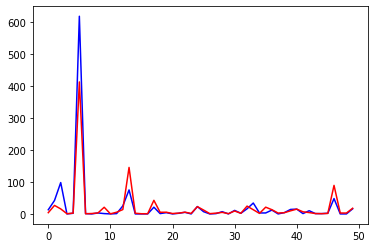

In [ ]:
# visualize predictions
plt.plot(y_test[:50], color='blue')
plt.plot(y_test_pred[:50], color='red')
plt.show()

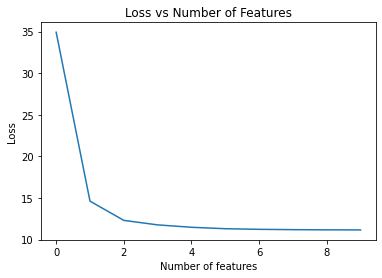

In [ ]:
# visualize losses
plt.plot(losses)
plt.xlabel('Number of features')
plt.ylabel('Loss')
plt.title('Loss vs Number of Features')
plt.show()

In [ ]:
# view selected features
for x in order_added:
    print(data_df.columns.values[x+1])

cases_7
cases_1
cases_6
cases_5
Population raw value
cases_2
cases_4
% Rural raw value
cases_3
